# PyCaret Project to Build and Deploy an ML App using Streamlit

## Customer Segmentation 

The dataset contains Customers profile having columns like  `Age`,`Income`,`Spending Score` and `Savings` and based on the same we are trying to **segment customers** so that our marketing team can target the potential buyer of our product.


Hence we will be using **clustering techniques with PyCaret module** to segment customers. 


Clustering is an **unsupervised learning algorithm** that tries to cluster data based on their similarity in the behaviour.

## Aim
To build an unsupervised learning model with the help of PyCaret library in python that can categorize the customers into different segments and deploy the model using streamlit.

## PyCaret 
it is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

## 1. Importing the required libraries and packages

In [116]:
import pandas as pd
from pycaret.clustering import *

## 2. Get the dataset

In [117]:
data = pd.read_csv('jewel_data.csv')
print(data.shape)
data.head()

(505, 5)


,Unnamed: 0,Age,Income,SpendingScore,Savings
0,0,58,77769,0.791329,6559.829923
1,1,59,81799,0.791082,5417.661426
2,2,62,74751,0.702657,9258.992965
3,3,59,74373,0.765680,7346.334504
4,4,87,17760,0.348778,16869.507130


In [118]:
data = data.drop(['Unnamed: 0'], axis=1)
data.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [119]:
data_seen = data.sample(frac=0.95, random_state=42).reset_index(drop=True)
data_unseen = data.drop(data_seen.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (480, 4)
Unseen Data For Predictions: (25, 4)


## 3. Setup PyCaret environment

The `setup()` function **initializes the environment** in pycaret and **creates the transformation pipeline** to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret.

When setup() is executed, PyCaret's inference algorithm will automatically **infer the data types for all features based on certain properties**. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment.

In [120]:
#from pycaret.clustering import *
cust_exp = setup(data = data)

,Description,Value
0,Session id,2275
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

- Missing Values : When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is True as the data contains missing values which are automatically imputed using mean for numeric features and constant for categorical features. The method of imputation can be changed using the numeric_imputation and categorical_imputation parameters in setup().

- Original Data : Displays the original shape of dataset. In this experiment (505, 4) means 505 samples and 4 features.

- Transformed Data : Displays the shape of the transformed dataset. The number of features can increase due to encoding of categorical features in the dataset if there is any.

- Numeric Features : The number of features inferred as numeric. 

- Categorical Features : The number of features inferred as categorical. 

## 4. Model Creation

In [121]:
kmeans = create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


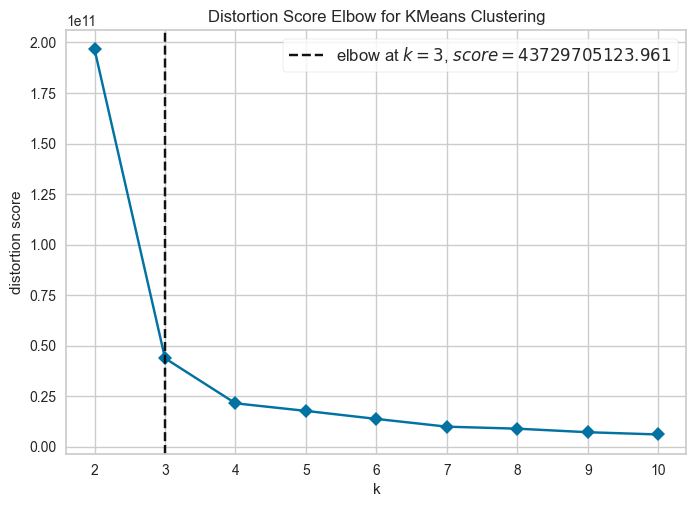

In [122]:
plot_model(kmeans,plot = 'elbow')

In [123]:
print(kmeans)

KMeans(n_clusters=4, random_state=2275)


## 5. Model Assigning

Now that we have created a model, we would like to assign the cluster labels to our dataset to analyze the results. We will achieve this by using the **assign_model()** function.

In [124]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 0
1,59,81799,0.791082,5417.661621,Cluster 0
2,62,74751,0.702657,9258.993164,Cluster 0
3,59,74373,0.765680,7346.334473,Cluster 0
4,87,17760,0.348778,16869.507812,Cluster 2


In [125]:
kmean_results.Savings.max()

20000.0

In [126]:
kmean_results[kmean_results['Cluster'] == 'Cluster 0']

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 0
1,59,81799,0.791082,5417.661621,Cluster 0
2,62,74751,0.702657,9258.993164,Cluster 0
3,59,74373,0.765680,7346.334473,Cluster 0
6,54,76500,0.785198,6878.884277,Cluster 0
...,...,...,...,...,...
479,59,69408,0.879906,6491.770996,Cluster 0
480,65,71229,0.787890,9024.337891,Cluster 0
491,58,70369,0.904521,7461.567383,Cluster 0
492,61,74282,0.692236,7286.754883,Cluster 0


## 6. Plotting model

In [127]:
plot_model(kmeans)

In [128]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [137]:
from pycaret.clustering import assign_model

# Assigner les clusters aux données d'origine
clustered_data = assign_model(kmeans)

# Afficher les statistiques moyennes par cluster
cluster_info = clustered_data.groupby('Cluster').mean()
print(cluster_info)


                 Age         Income  SpendingScore       Savings
Cluster                                                         
Cluster 0  59.961538   72332.846154       0.771296   6890.893555
Cluster 1  35.423077  105228.392308       0.302153  14937.836914
Cluster 2  87.775510   27866.102041       0.328800  16659.261719
Cluster 3  40.875000  126031.666667       0.654598   7287.926270


- Cluster 0: Older individuals with an average income and a high propensity to spend.
- Cluster 1: Young professionals with high income, but higher savings and moderate consumption.
- Cluster 2: Retirees with low income but high savings, and low consumption.
- Cluster 3: Wealthy profiles with very high income and moderate to high consumption.

In [130]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.to_csv("test.csv",index=False)

## 7. Making predictions

The **predict_model()** function is used to assign cluster labels to a new unseen dataset. We will now use our kmeans model to predict the data stored in data_unseen. This variable was created at the beginning of the tutorial and contains 54 samples from the original dataset that were never exposed to PyCaret.

In [131]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,65.0,71229.0,0.787890,9024.337461,Cluster 0
1,86.0,23400.0,0.278036,15215.281264,Cluster 2
2,32.0,108417.0,0.287371,16696.398659,Cluster 1
3,84.0,24105.0,0.271809,16524.902538,Cluster 2
4,84.0,30481.0,0.397023,16837.205965,Cluster 2


## 8. Saving Model

In [132]:
save_model(kmeans,'Final Kmeans Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=4, random_state=2275))]),
 'Final Kmeans Model.pkl')

## 9. Loading the saved model

In [133]:
saved_kmeans = load_model('Final Kmeans Model')

Transformation Pipeline and Model Successfully Loaded


In [134]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [135]:
new_prediction.head()

,Age,Income,SpendingScore,Savings,Cluster
0,65,71229,0.787890,9024.337891,Cluster 0
1,86,23400,0.278036,15215.281250,Cluster 2
2,32,108417,0.287371,16696.398438,Cluster 1
3,84,24105,0.271809,16524.902344,Cluster 2
4,84,30481,0.397023,16837.205078,Cluster 2


## 10. Creating streamlit application